In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
dfj = pd.read_csv('../data/train/jump.csv')
dfr = pd.read_csv('../data/train/ready.csv')

In [23]:
def compute_3d_distance(hand, d1=5, d2=8):
    p1 = hand[[f'p_{d1+1}_x', f'p_{d1+1}_y', f'p_{d1+1}_z']]
    p2 = hand[[f'p_{d2+1}_x', f'p_{d2+1}_y', f'p_{d2+1}_z']]
    d = np.square(p1[0]-p2[0]) + np.square(p1[1]-p2[1]) + np.square(p1[2]-p2[2])
    d = np.sqrt(d)
    return d

In [43]:
def compute_2d_distance(hand, d1=20, d2=4):
    p1 = hand[[f'p_{d1+1}_x', f'p_{d1+1}_y']]
    p2 = hand[[f'p_{d2+1}_x', f'p_{d2+1}_y']]
    d = np.square(p1[0]-p2[0]) + np.square(p1[1]-p2[1])
    d = np.sqrt(d)
    return d

In [44]:
dfj['d'] = dfj.apply(lambda x: compute_2d_distance(x), axis=1)
dfr['d'] = dfr.apply(lambda x: compute_2d_distance(x), axis=1)

In [48]:
dfj.to_csv('../data/train/jump.csv', index=None)
dfr.to_csv('../data/train/ready.csv', index=None)

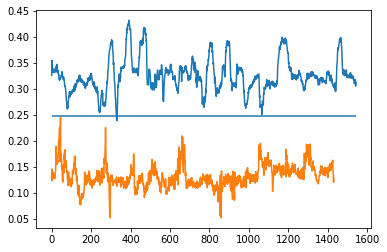

In [60]:
plt.plot(dfj['d'])
plt.plot(dfr['d'])
plt.hlines(y=0.248, xmin=0, xmax=len(dfj))

In [62]:
dfj.head(10)

,p_1_x,p_1_y,p_1_z,p_2_x,p_2_y,p_2_z,p_3_x,p_3_y,p_3_z,p_4_x,...,p_19_y,p_19_z,p_20_x,p_20_y,p_20_z,p_21_x,p_21_y,p_21_z,sign,d
0,0.726978,0.325562,-0.000028,0.776913,0.240121,0.014996,0.791165,0.157835,0.019096,0.792558,...,0.204948,0.015203,0.504538,0.183299,0.015220,0.481816,0.167124,0.016729,0,0.326302
1,0.731943,0.363631,0.000004,0.773383,0.263925,0.044849,0.780769,0.175081,0.064280,0.787866,...,0.220127,0.032071,0.491243,0.196780,0.027782,0.464943,0.172070,0.018636,0,0.345141
2,0.729658,0.367160,-0.000029,0.769930,0.259874,0.045071,0.778542,0.169069,0.059364,0.787991,...,0.221645,0.027726,0.489217,0.197417,0.029473,0.463362,0.173769,0.027259,0,0.355256
3,0.735287,0.364817,-0.000050,0.784040,0.261273,0.047870,0.794286,0.170992,0.069247,0.792312,...,0.221813,0.054540,0.489247,0.198568,0.058382,0.462574,0.173814,0.057568,0,0.339814
4,0.731949,0.358627,-0.000035,0.781304,0.253621,0.043964,0.795089,0.166500,0.062684,0.792761,...,0.221528,0.046676,0.487040,0.196176,0.048140,0.461555,0.168653,0.044887,0,0.333799
5,0.734665,0.372496,-0.000029,0.783232,0.265762,0.042326,0.793457,0.172276,0.063954,0.790390,...,0.221354,0.061854,0.488520,0.195704,0.061647,0.463549,0.169475,0.057793,0,0.340056
6,0.733853,0.364840,-0.000047,0.783253,0.259520,0.046891,0.794610,0.169741,0.069474,0.790976,...,0.225146,0.058680,0.486681,0.200264,0.061594,0.460028,0.174303,0.060340,0,0.333726
7,0.732890,0.362396,-0.000022,0.785786,0.259417,0.037803,0.797198,0.169673,0.058517,0.789579,...,0.226561,0.042725,0.488209,0.201736,0.041309,0.460718,0.174740,0.034548,0,0.335413
8,0.731669,0.365463,-0.000022,0.785861,0.262326,0.043825,0.796213,0.171192,0.070152,0.787971,...,0.222659,0.053511,0.486927,0.198085,0.053284,0.458936,0.171779,0.047664,0,0.332447
9,0.735205,0.362485,-0.000008,0.787839,0.259993,0.033262,0.797812,0.169403,0.054972,0.789026,...,0.224447,0.044102,0.488606,0.198563,0.041165,0.460402,0.170344,0.033826,0,0.332809


In [61]:
dfr.head(10)

,p_1_x,p_1_y,p_1_z,p_2_x,p_2_y,p_2_z,p_3_x,p_3_y,p_3_z,p_4_x,...,p_19_y,p_19_z,p_20_x,p_20_y,p_20_z,p_21_x,p_21_y,p_21_z,sign,d
0,0.762281,0.431012,3.708476e-05,0.760168,0.363007,0.018102,0.722589,0.299677,-0.004807,0.664226,...,0.363247,-0.123553,0.638909,0.381405,-0.098946,0.654782,0.392813,-0.096194,1,0.130105
1,0.748957,0.454771,2.456141e-05,0.756849,0.387730,0.041897,0.727507,0.321094,0.027392,0.674264,...,0.386846,-0.098821,0.640633,0.410379,-0.073778,0.657751,0.417163,-0.074332,1,0.145818
2,0.748606,0.464930,-1.445195e-05,0.762090,0.399540,0.043019,0.738635,0.330360,0.026772,0.691679,...,0.381097,-0.091357,0.637920,0.407458,-0.064477,0.656659,0.412725,-0.064679,1,0.123157
3,0.755099,0.468001,-2.027930e-05,0.763885,0.397487,0.047674,0.737444,0.327586,0.032163,0.688205,...,0.382322,-0.088765,0.637615,0.409850,-0.060425,0.658450,0.415023,-0.059359,1,0.126356
4,0.753348,0.476964,8.014957e-07,0.766141,0.401045,0.047947,0.745995,0.323920,0.035881,0.699389,...,0.387542,-0.079962,0.629890,0.414746,-0.051552,0.647519,0.424701,-0.050865,1,0.137630
5,0.754027,0.479341,5.405245e-06,0.765799,0.402435,0.060020,0.746843,0.326836,0.052864,0.702192,...,0.389537,-0.070378,0.632147,0.419570,-0.039739,0.651105,0.428306,-0.037134,1,0.141640
6,0.757493,0.482444,2.296717e-06,0.769687,0.403759,0.059531,0.752425,0.328407,0.053722,0.709734,...,0.389153,-0.061818,0.635392,0.418778,-0.033696,0.654812,0.427369,-0.033895,1,0.138415
7,0.753944,0.484156,2.308302e-05,0.769312,0.402367,0.061468,0.755198,0.325874,0.062359,0.715524,...,0.376365,-0.055330,0.635227,0.404267,-0.025903,0.653797,0.415267,-0.022615,1,0.127865
8,0.756031,0.485023,1.550638e-05,0.771847,0.400566,0.054339,0.757854,0.321275,0.051852,0.716976,...,0.376863,-0.056084,0.635799,0.403976,-0.026263,0.654389,0.415474,-0.022041,1,0.131742
9,0.754833,0.487206,1.246949e-05,0.772188,0.404626,0.056767,0.759051,0.323549,0.055029,0.720676,...,0.377860,-0.059719,0.637789,0.404621,-0.029977,0.656152,0.416073,-0.026604,1,0.133501


In [51]:
cols = dfj.columns.tolist()
cols

['p_1_x',
 'p_1_y',
 'p_1_z',
 'p_2_x',
 'p_2_y',
 'p_2_z',
 'p_3_x',
 'p_3_y',
 'p_3_z',
 'p_4_x',
 'p_4_y',
 'p_4_z',
 'p_5_x',
 'p_5_y',
 'p_5_z',
 'p_6_x',
 'p_6_y',
 'p_6_z',
 'p_7_x',
 'p_7_y',
 'p_7_z',
 'p_8_x',
 'p_8_y',
 'p_8_z',
 'p_9_x',
 'p_9_y',
 'p_9_z',
 'p_10_x',
 'p_10_y',
 'p_10_z',
 'p_11_x',
 'p_11_y',
 'p_11_z',
 'p_12_x',
 'p_12_y',
 'p_12_z',
 'p_13_x',
 'p_13_y',
 'p_13_z',
 'p_14_x',
 'p_14_y',
 'p_14_z',
 'p_15_x',
 'p_15_y',
 'p_15_z',
 'p_16_x',
 'p_16_y',
 'p_16_z',
 'p_17_x',
 'p_17_y',
 'p_17_z',
 'p_18_x',
 'p_18_y',
 'p_18_z',
 'p_19_x',
 'p_19_y',
 'p_19_z',
 'p_20_x',
 'p_20_y',
 'p_20_z',
 'p_21_x',
 'p_21_y',
 'p_21_z',
 'sign',
 'd']

In [53]:
cols.index('p_5_x')

12

In [54]:
cols.index('p_21_x')

60